## Example end to end project.
This is an overview of the work flow. 
1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insight
4. prepare the data for Machine Learning algorighms
5. Select a model and train it 
6. Fine-tune the model
7. Present the solution 
8. Launch, monitor, and maintain the system 

### Frame the problem
This is supervised learning task. Since the goal of the project is to predict housing price, it's a regression problem. The data is small enough to fit in the memory and plaiin batch learning is good enough.  

### Select performance measure
- RMSE Vs MAE
RMSE is generally prefered in this task. 

In [1]:
#Check working directory
import sys
sys.executable

'd:\\projects\\House_price_prediction\\venv\\Scripts\\python.exe'

In [2]:
#connecting to database & fetching data 
# import psycopg2
import pandas as pd
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

load_dotenv()

DATABASE_HOST = os.environ.get('DATABASE_HOST')
DATABASE_NAME = os.environ.get('DATABASE_NAME')
DATABASE_USER = os.environ.get('DATABASE_USER')
DATABASE_PASSWORD = os.environ.get('DATABASE_PASSWORD')

db_host = DATABASE_HOST
db_name = DATABASE_NAME
db_user = DATABASE_USER
db_password = DATABASE_PASSWORD

db_url = f'postgresql://{db_user}:{db_password}@{db_host}/{db_name}'
engine = create_engine(db_url)


In [3]:
# Execute a SQL query to retrieve data
df = pd.read_sql(DATABASE_NAME, engine)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#It seems like pandas interprets the columns as object data type and it needs to be converted to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   longitude           20640 non-null  object
 1   latitude            20640 non-null  object
 2   housing_median_age  20640 non-null  object
 3   total_rooms         20640 non-null  object
 4   total_bedrooms      20433 non-null  object
 5   population          20640 non-null  object
 6   households          20640 non-null  object
 7   median_income       20640 non-null  object
 8   median_house_value  20640 non-null  object
 9   ocean_proximity     20640 non-null  object
dtypes: object(10)
memory usage: 1.6+ MB


In [6]:
# Convert columns to numeric
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

print(df.dtypes)


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [7]:
#See if there is any missing value in the dataset (NaN, null, NaT, etc.)
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [8]:
#Missing values in the dataset in percentile per column
for col in df:
    print(col,':', round(df[col].isnull().sum()/df.shape[0]*100, 3), '%')

longitude : 0.0 %
latitude : 0.0 %
housing_median_age : 0.0 %
total_rooms : 0.0 %
total_bedrooms : 1.003 %
population : 0.0 %
households : 0.0 %
median_income : 0.0 %
median_house_value : 0.0 %
ocean_proximity : 0.0 %


In [9]:
#Check for number of missing data for each column
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
#Summary of  the dataset
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


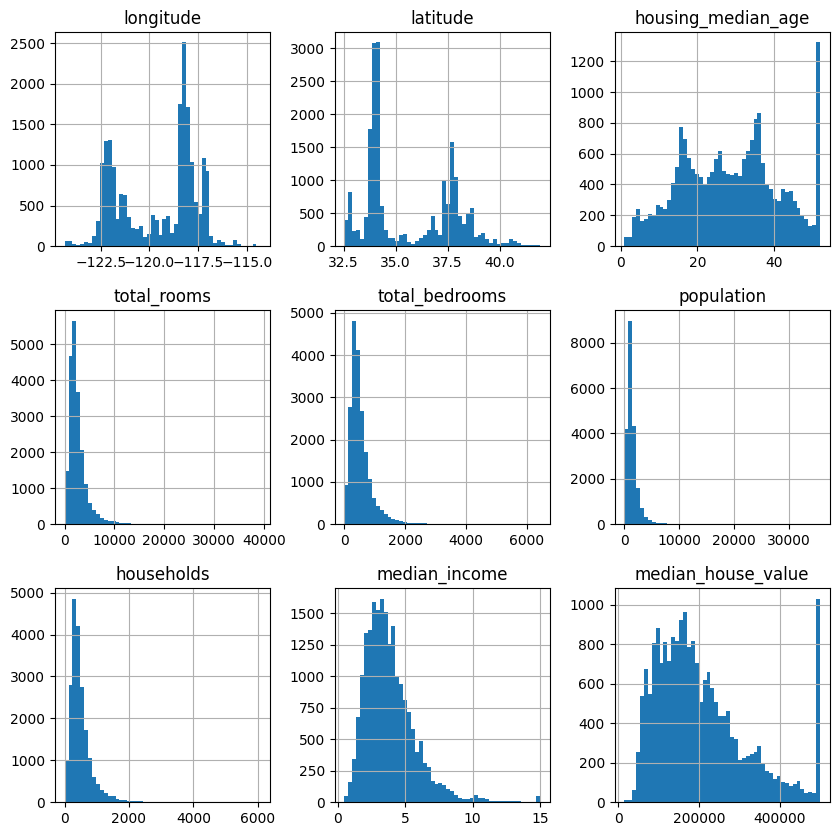

In [11]:
#Visualize the distribution of each column by ploting histograms for each column 
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(10, 10))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

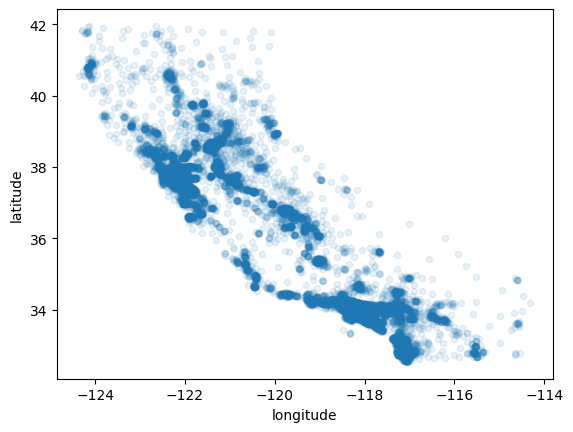

In [12]:
#Visualize density of data points
df.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.1)

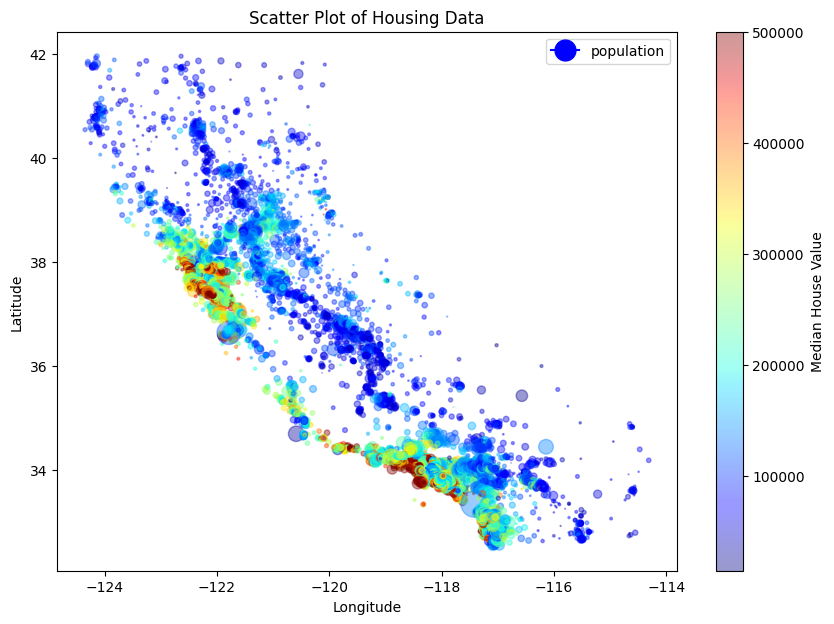

In [13]:
#Plot population size and median income values. set color of each point based on data value
#set size of the points in the scatter plot based on population column
# Add colorbar to the plot with a label
# Create a custom legend handler with a circle marker
# Create a custom legend handler with a circle marker
import matplotlib.lines as mlines

plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='jet', s=df['population']/100, alpha=0.4)
plt.colorbar(label='Median House Value')  # Add a colorbar with a label
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Housing Data')

# Create a custom legend with a circle marker
legend_circle = mlines.Line2D([], [], color='blue', marker='o', markersize=15, label='population')
plt.legend(handles=[legend_circle])
plt.show()



In [14]:
#drop non numeric value.
df_1=df.drop('ocean_proximity', axis=1)
#check for correlations between the columns
df_1.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<Axes: >

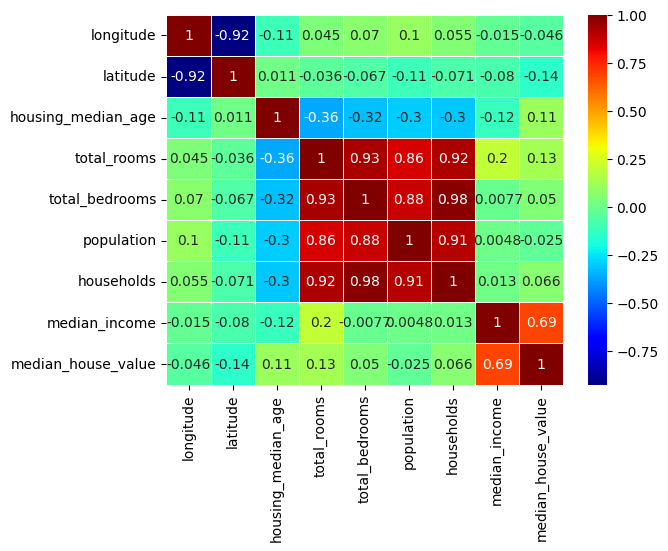

In [15]:
#visualize the correlation using heatmap. It shows strong correlation bn median_house_value and median_income = 0.69
import seaborn as sns
sns.heatmap(df_1.corr(), annot=True, linewidth=0.5, cmap='jet')

<Axes: xlabel='median_income', ylabel='median_house_value'>

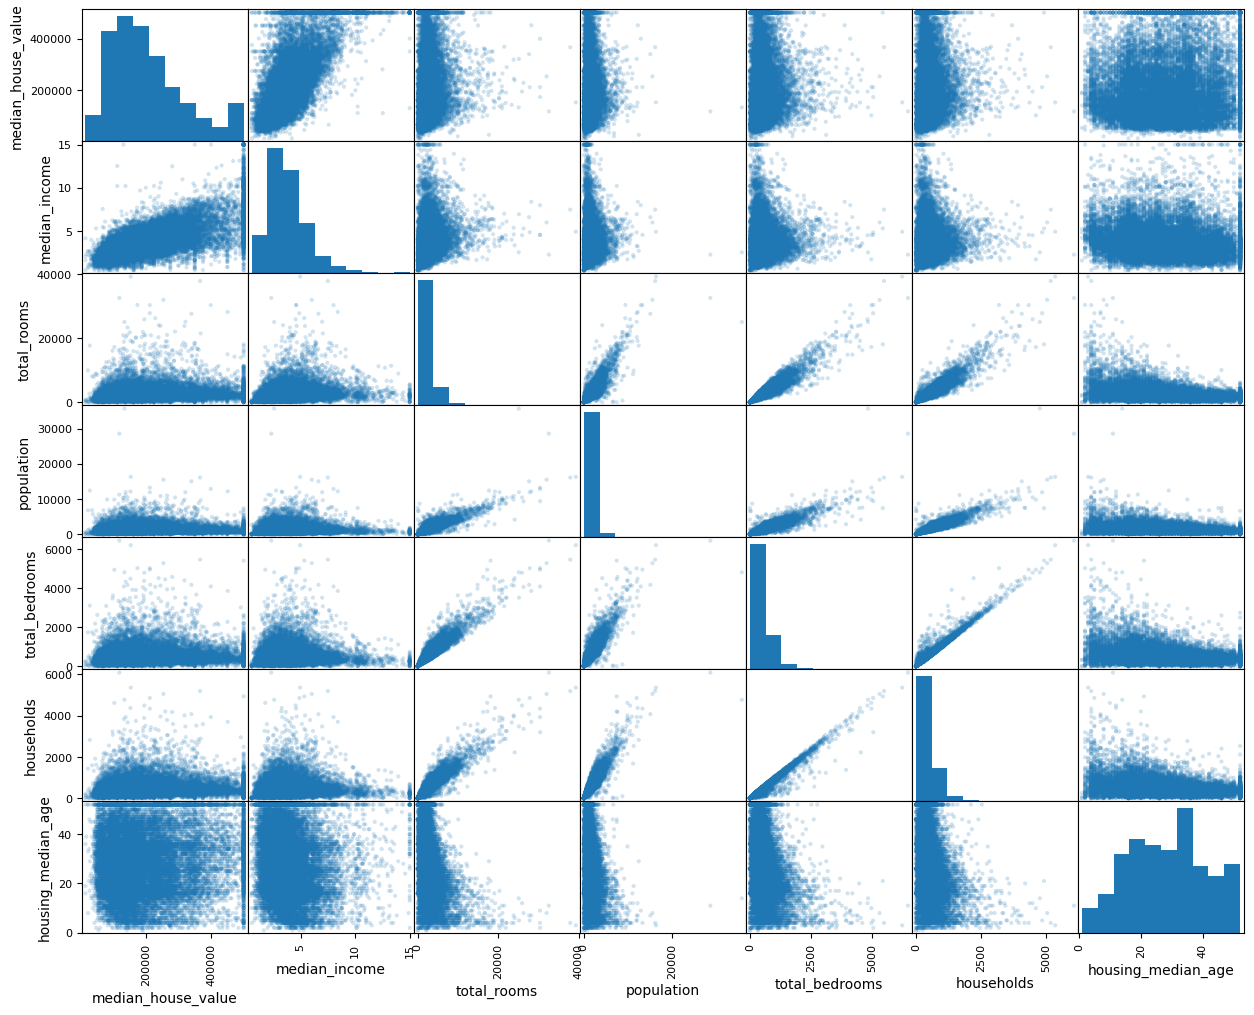

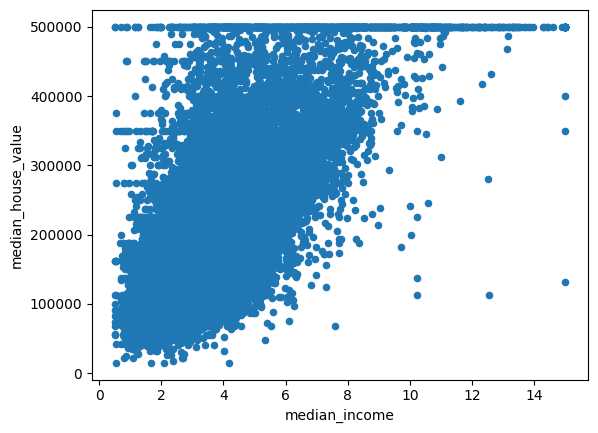

In [16]:
#Scatter plot of the data shows, house value increases as median income increases
from pandas.plotting import scatter_matrix
#Get and plot the attributes with posetive linear correlation
attributes_to_plot = df[['median_house_value', 'median_income', 'total_rooms', 'population', 'total_bedrooms', 'households','housing_median_age']]
scatter_matrix(attributes_to_plot, figsize=(15, 12), alpha=0.2)
df.plot(kind='scatter', x='median_income', y='median_house_value')

In [17]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import hashlib
import numpy as np 
import os
#create unique identifier based on data that does not change over time
df['id'] = df['longitude'].astype(str)  + df['latitude'].astype(str)
df['id'] = df['id'].apply(lambda x: hashlib.md5(x.encode()).hexdigest())

#split into initial training set and test set
train_set, test_set = train_test_split(df, test_size = 0.3, random_state=42)

# Define the income categories and create income categories with bins
income_bins = [0, 2, 4, 6, 8, np.inf]  
income_labels = [1, 2, 3, 4, 5]
df['income_category'] = pd.cut(df['median_income'], bins=income_bins, labels=income_labels)

#stratified split to further split the initial training set
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in stratified_split.split(df, df['income_category']):
    stratified_train_set = df.loc[train_index]
    stratified_test_set = df.loc[test_index]

for set_ in (stratified_train_set, stratified_test_set):
    set_.drop(columns=['income_category'], axis=1, inplace=True)



df = stratified_train_set.drop('median_house_value', axis=1)
df_target = stratified_test_set['median_house_value'].copy()   
# # sve tran_set and test_set in separet files
# stratified_train_file_path = "stratified_train_set.csv"
# stratified_test_file_path = "stratified_test_set.csv"

# # Check if the train and test files already exist
# if os.path.exists(stratified_train_file_path and stratified_test_file_path):
#     # If the file exists either replace it or append to it
#     stratified_train_set.to_csv(stratified_train_file_path, index=False, mode='a', header=False)
#     stratified_test_set.to_csv(stratified_test_file_path, index=False, mode='a', header=False)
# else:
#     # If file does not exist, create a new file
#     stratified_train_set.to_csv(stratified_train_file_path, index=False)
#     stratified_test_set.to_csv(stratified_test_file_path, index=False)


In [18]:
missing_values_exist = df['total_bedrooms'].isna().any()

# Print the result
if missing_values_exist:
    print("Missing values exist in the 'total_bedrooms' column.")
else:
    print("No missing values in the 'total_bedrooms' column.")
    

Missing values exist in the 'total_bedrooms' column.


In [23]:
missing_values = df['total_bedrooms'].isna()# Check the missing value of the column total_bedroms

# Count the number of NaN values
nan_count = missing_values.sum()
print("NaN Count:", nan_count)
print("Columns with missing values:")
# print(missing_values[missing_values].index.tolist())

NaN Count: 151
Columns with missing values:


In [28]:
# Fill the missing values with median value of the column
# Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.
# SimpleImputer takes two argument such as missing_values and strategy.
from sklearn.impute import SimpleImputer
# list the unique values and their counts in a column with strings
ocean_proximity_counts = df['ocean_proximity'].value_counts()
print(ocean_proximity_counts)
imputer = SimpleImputer(strategy='median')

# df_1 is without ocean proximity column
imputer.fit(df_1)
# Create a DataFrame from the transformed data
X = imputer.transform(df_1)


ocean_proximity
<1H OCEAN     6345
INLAND        4621
NEAR OCEAN    1860
NEAR BAY      1619
ISLAND           3
Name: count, dtype: int64


array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [32]:
# 
transformed_df_1= pd.DataFrame(X, columns=df_1.columns)
transformed_df_1


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# define a custom transformer to handle the numerical and non-numerical columns
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# List of numerical and non-numerical column names
numerical_cols = list(df_1)
categorical_cols = ['ocean_proximity']

# Create a pipeline for numerical columns
numerical_pipeline = Pipeline([
    ('selector', DataFrameSelector(numerical_cols)),  # Select numerical columns
    ('scaler', StandardScaler())  # Standardize numerical data
])

# Create a pipeline for categorical columns
categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(categorical_cols)),  # Select categorical column
    ('encoder', OneHotEncoder(sparse=False))  # One-hot encode categorical data
])

# Combine the pipelines using ColumnTransformer
full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols),
])

# Fit and transform your data using the full pipeline
transformed_data = full_pipeline.fit_transform(df)



TypeError: Feature names are only supported if all input features have string names, but your input has ['quoted_name', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.